In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import yfinance as yf
from sklearn.linear_model import LinearRegression

___

### Train Data

In [53]:
btc = yf.Ticker("BTC-USD")

startDate = dt.datetime(2016,1,1)
endDate = dt.datetime(2018,1,1)
btcTrain = btc.history(start=startDate, end=endDate).drop(["Dividends","Stock Splits","Volume"], axis = 1)
btcTrain=btcTrain.set_index(np.arange(btcTrain.shape[0]))

startDate = dt.datetime(2016,1,2)
endDate = dt.datetime(2018,1,2)
btcTomorrowTrain = btc.history(start=startDate, end=endDate).drop(["Dividends","Stock Splits","Volume","High","Low","Open"], axis = 1)
btcTomorrowTrain=btcTomorrowTrain.set_index(np.arange(btcTomorrowTrain.shape[0]))

btcTrain["CloseTomorrow"] = btcTomorrowTrain["Close"]
btcTrain

,Open,High,Low,Close,CloseTomorrow
0,425.875000,432.920990,418.734985,430.566986,434.334015
1,430.721008,436.246002,427.515015,434.334015,433.437988
2,434.622009,436.062012,431.869995,433.437988,430.010986
3,433.578003,433.743011,424.705994,430.010986,433.091003
4,430.061005,434.516998,429.084015,433.091003,431.959991
...,...,...,...,...,...
727,16163.500000,16930.900391,15114.299805,15838.500000,14606.500000
728,15864.099609,15888.400391,13937.299805,14606.500000,14656.200195
729,14695.799805,15279.000000,14307.000000,14656.200195,12952.200195
730,14681.900391,14681.900391,12350.099609,12952.200195,14156.400391


### Test Data

In [54]:
startDate = dt.datetime(2021,1,1)
endDate = dt.datetime(2022,1,1)
btcTest = btc.history(start=startDate, end=endDate).drop(["Dividends","Stock Splits","Volume"], axis = 1)
btcTest=btcTest.set_index(np.arange(btcTest.shape[0]))


startDate = dt.datetime(2021,1,2)
endDate = dt.datetime(2022,1,2)
btcTomorrowTest = btc.history(start=startDate, end=endDate).drop(["Dividends","Stock Splits","Volume","High","Low","Open"], axis = 1)
btcTomorrowTest=btcTomorrowTest.set_index(np.arange(btcTomorrowTest.shape[0]))

btcTest["CloseTomorrow"] = btcTomorrowTest["Close"]
startDate = dt.datetime(2021,1,1)
endDate = dt.datetime(2022,1,1)
history = btc.history(start=startDate, end=endDate)

btcTest

,Open,High,Low,Close,CloseTomorrow
0,28841.574219,29244.876953,28201.992188,29001.720703,29374.152344
1,28994.009766,29600.626953,28803.585938,29374.152344,32127.267578
2,29376.455078,33155.117188,29091.181641,32127.267578,32782.023438
3,32129.408203,34608.558594,32052.316406,32782.023438,31971.914062
4,32810.949219,33440.218750,28722.755859,31971.914062,33992.429688
...,...,...,...,...,...
361,50802.609375,51956.328125,50499.468750,50640.417969,47588.855469
362,50679.859375,50679.859375,47414.210938,47588.855469,46444.710938
363,47623.871094,48119.742188,46201.496094,46444.710938,47178.125000
364,46490.605469,47879.964844,46060.312500,47178.125000,46306.445312


____

### Model

In [55]:
linearModel = LinearRegression()
model = linearModel.fit(btcTrain.drop(["CloseTomorrow"], axis = 1),btcTrain["CloseTomorrow"])

### Test

In [60]:
results = []
for i in range(btcTest.shape[0]):
    data = []
    for j in range(4):
        data.append([btcTest.iloc[i][j]])
    data = pd.DataFrame(data).T
    results.append(model.predict(data)[0])

,0,1,2,3
0,47169.371094,48472.527344,45819.953125,46306.445312


____

### Visualizition

#### Lineplot

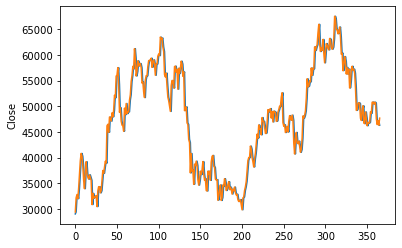

In [57]:
sns.lineplot(y=btcTest["Close"], x=btcTest["CloseTomorrow"].index)
sns.lineplot(y=btcTest["CloseTomorrow"], x=btcTest["CloseTomorrow"].index);

In [58]:
results[-1]

46124.66053315948